In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.lines as mlines
from pylab import bone, pcolor, colorbar, plot, show

!pip install minisom
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


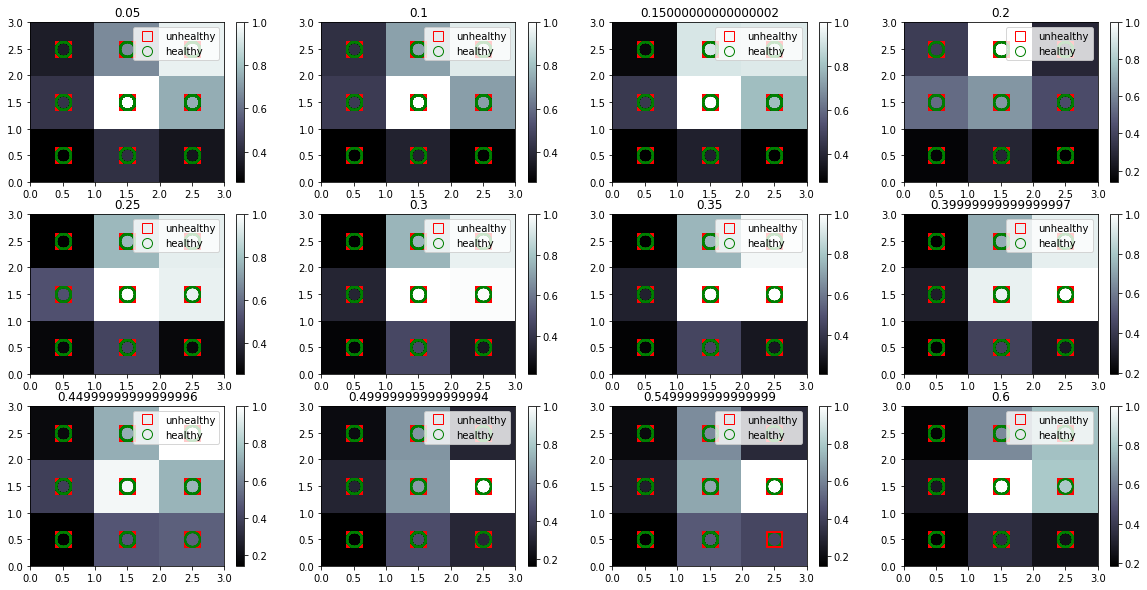

In [51]:
plt.figure(figsize = (20,10))
lr = 0

for i in range(12):
  lr += 0.05
  plt.subplot(3,4,i+1)
  plt.title(lr)

  main_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 
                                                                                             'Age', 
                                                                                             'Health_Status', 
                                                                                             'Archaeal', 
                                                                                             'Bacteriophage', 
                                                                                             'Eukaryotic', 
                                                                                             'crassphage'], axis=1)
  main_df = main_df[['Myoviridae', 'Siphoviridae', 'Podoviridae', 'Microviridae', 'Healthy',
                     'Age_Child', 'Age_Adult', 'Age_Infant', 'Age_Elderly']] 
  target = 'Healthy'

  X = main_df.loc[:,main_df.columns!=target]
  y = main_df.loc[:,main_df.columns==target]

  oversample = SMOTE(random_state=42)
  X, y = oversample.fit_resample(X, y)

  virus_ml_df = pd.concat([X, y], axis=1)
  X = virus_ml_df.drop(['Healthy'], axis=1).values
  y = virus_ml_df['Healthy'].values 

  som = MiniSom(x=3, y=3, input_len=8, sigma=1.0, learning_rate=lr, random_seed=42)
  som.random_weights_init(X)
  som.train_batch(data=X, num_iteration=200)

  # plt.figure(figsize = (20,10))
  bone()
  pcolor(som.distance_map().T)
  colorbar() 

  markers = ['o', 's']
  colors = ['green', 'red']
  status = ['healthy', 'unheathy']

  ls_tmp = []

  for i, j in enumerate(X):          
      wn = som.winner(j) 
      plot(wn[0] + 0.5, wn[1] + 0.5, markers[int(y[i])], markeredgecolor = colors[int(y[i])], markerfacecolor = 'None', markersize=15,
                  markeredgewidth = 2)
      # if wn[0] == 1:
        # if wn[1] == 4:
          # ls_tmp.append(int(y[i]))
      
  red_square = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markerfacecolor = 'None',
                            markersize=10, label='unhealthy')
  green_circle = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markerfacecolor = 'None',
                            markersize=10, label='healthy')
  plt.legend(handles=[red_square, green_circle], loc=1)

75.0


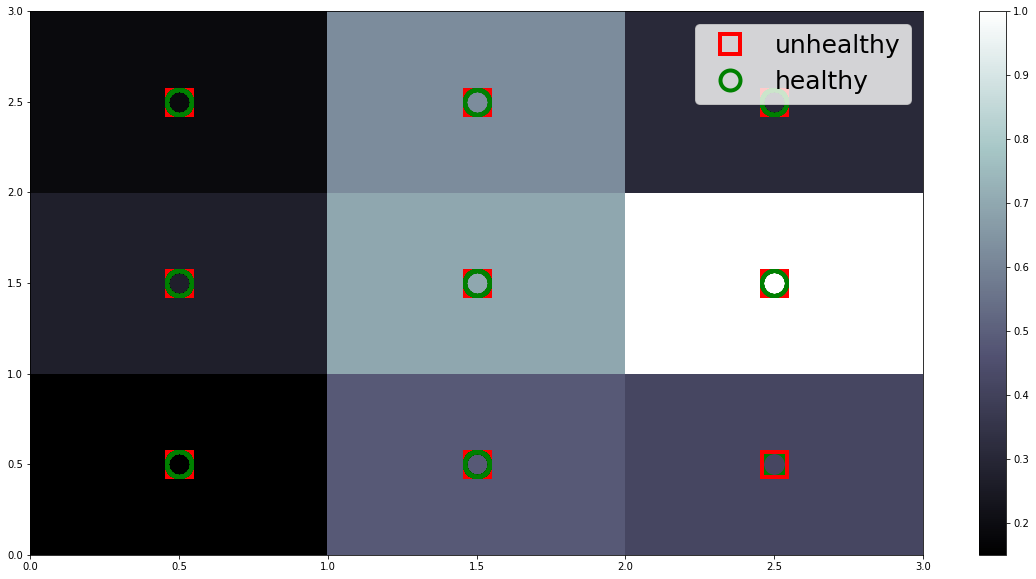

In [52]:
main_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 
                                                                                             'Age', 
                                                                                             'Health_Status', 
                                                                                             'Archaeal', 
                                                                                             'Bacteriophage', 
                                                                                             'Eukaryotic', 
                                                                                             'crassphage'], axis=1) 
main_df = main_df[['Healthy', 'Myoviridae', 'Siphoviridae', 'Podoviridae', 'Microviridae',
                     'Age_Child', 'Age_Adult', 'Age_Infant', 'Age_Elderly']] 

target = 'Healthy'
X = main_df.loc[:,main_df.columns!=target]
y = main_df.loc[:,main_df.columns==target]

oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)

virus_ml_df = pd.concat([X, y], axis=1)
X = virus_ml_df.drop(['Healthy'], axis=1).values
y = virus_ml_df['Healthy'].values 

som = MiniSom(x=3, y=3, input_len=8, sigma=1.0, learning_rate=0.55, random_seed=42)
som.random_weights_init(X)
som.train_batch(data=X, num_iteration=200)

plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar() 

markers = ['o', 's']
colors = ['green', 'red']
status = ['healthy', 'unheathy']

ls_tmp = []

for i, j in enumerate(X):          
    wn = som.winner(j)             
    plot(wn[0] + 0.5, wn[1] + 0.5, markers[int(y[i])], markeredgecolor = colors[int(y[i])], markerfacecolor = 'None', markersize=25,
                markeredgewidth = 4)
    if wn[0] == 2:
      if wn[1] == 1:
        ls_tmp.append(int(y[i]))
      
red_square = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markerfacecolor = 'None',
                          markersize=20, markeredgewidth=4, label='unhealthy')
green_circle = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markerfacecolor = 'None',
                          markersize=20, markeredgewidth=4, label='healthy')
plt.legend(handles=[red_square, green_circle], loc=1, fontsize=25)

print(ls_tmp.count(1)/(ls_tmp.count(0)+ls_tmp.count(1))*100)

In [53]:
mappings = som.win_map(X) 
result = mappings[(2,1)]
df_result = pd.DataFrame(result)
# df_result['Heathy'] = ls_tmp
print(df_result.shape)

columns_old = df_result.columns.tolist()

columns_main = main_df.columns.tolist()[1:]

for i in range(len(columns_old)):
  df_result = df_result.rename({columns_old[i]: columns_main[i]}, axis=1)
df_result.head()

(32, 8)


,Myoviridae,Siphoviridae,Podoviridae,Microviridae,Age_Child,Age_Adult,Age_Infant,Age_Elderly
0,0.0,132.0,26.3,61.4,0.0,1.0,0.0,0.0
1,0.0,121.0,53.9,40.4,0.0,1.0,0.0,0.0
2,13.7,247.0,41.2,27.5,0.0,1.0,0.0,0.0
3,0.0,102.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,116.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
df = df_result[['Myoviridae', 'Siphoviridae', 'Podoviridae', 'Microviridae']]
# df = df_result
df['Healthy'] = ls_tmp
df = df[df['Healthy']==1]
print(df.shape)
df.head()

(24, 5)


<ipython-input-54-5feb45aeda30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Healthy'] = ls_tmp


,Myoviridae,Siphoviridae,Podoviridae,Microviridae,Healthy
0,0.0,132.0,26.3,61.4,1
1,0.0,121.0,53.9,40.4,1
2,13.7,247.0,41.2,27.5,1
3,0.0,102.0,0.0,0.0,1
4,0.0,116.0,0.0,0.0,1


In [55]:
df.mean()

Myoviridae       18.166667
Siphoviridae    167.870833
Podoviridae      54.527500
Microviridae     55.654167
Healthy           1.000000
dtype: float64

In [56]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25, q75 + 1.5 * iqr)
    return boundaries

In [57]:
df_critical_values = pd.DataFrame()
for col in df.columns:
    col_outliers = calculate_outliers(df[col])
    col_max = df[col].max()
    col_stats = {'mean': df[col].mean(),
                 'q25': col_outliers[0],
                 'q75': col_outliers[1],
                 'max': col_max}
    df_critical_values[col] = pd.Series(col_stats)
df_critical_values = df_critical_values.T
df_critical_values

,mean,q25,q75,max
Myoviridae,18.166667,0.00,41.7500,153.0
Siphoviridae,167.870833,112.75,407.7500,343.0
Podoviridae,54.527500,0.00,110.9375,365.0
Microviridae,55.654167,0.00,223.1250,288.0
Healthy,1.000000,1.00,1.0000,1.0


In [58]:
virus_ml_df['Healthy'].value_counts()

1.0    1338
0.0    1338
Name: Healthy, dtype: int64

In [59]:
test = virus_ml_df
test = test[(test['Myoviridae']>=0) & (test['Myoviridae']<41.75) & (test['Siphoviridae']>=112) & (test['Siphoviridae']<407) &
            (test['Podoviridae']>=0) & (test['Podoviridae']<110.00) & (test['Microviridae']>=0) & (test['Microviridae']<223.00)]

test['Healthy'].value_counts()

1.0    15
0.0     6
Name: Healthy, dtype: int64

child

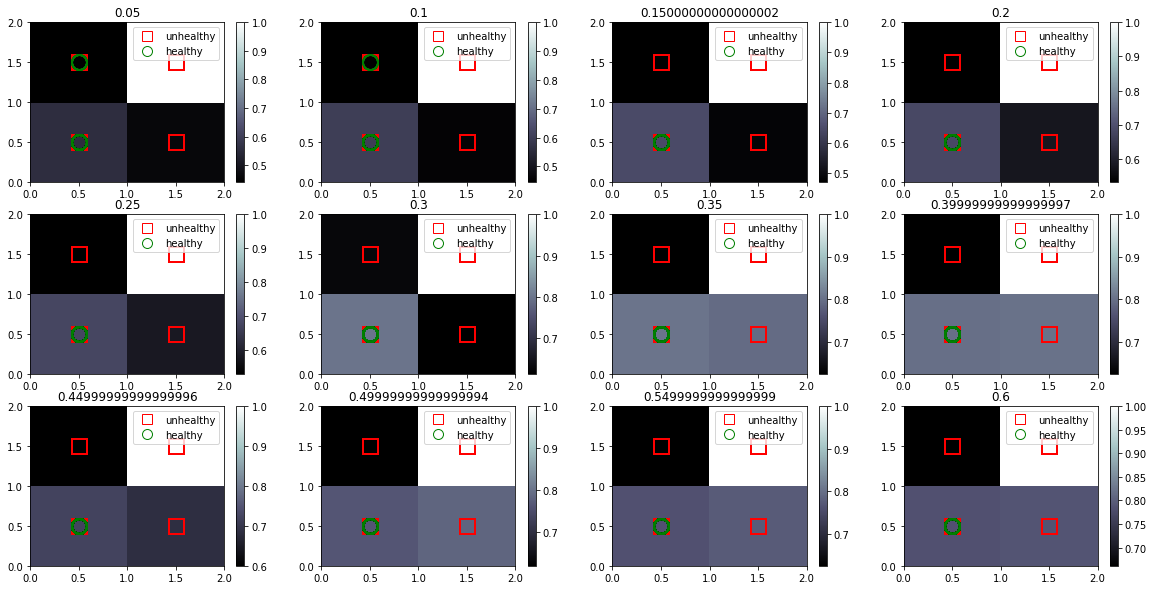

In [60]:
plt.figure(figsize = (20,10))
lr = 0

for i in range(12):
  lr += 0.05
  plt.subplot(3,4,i+1)
  plt.title(lr)

  main_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 
                                                                                             'Age', 
                                                                                             'Health_Status', 
                                                                                             'Archaeal', 
                                                                                             'Bacteriophage', 
                                                                                             'Eukaryotic', 
                                                                                             'crassphage'], axis=1) 
  main_df = main_df[['Healthy', 'Myoviridae', 'Siphoviridae', 'Podoviridae', 'Microviridae',
                     'Age_Child', 'Age_Adult', 'Age_Infant', 'Age_Elderly']] 
  main_df = main_df[main_df['Age_Child'] == 1.0]
  main_df = main_df.drop(['Age_Adult', 'Age_Elderly', 'Age_Infant', 'Age_Child'], axis=1)  

  target = 'Healthy'

  X = main_df.loc[:,main_df.columns!=target]
  y = main_df.loc[:,main_df.columns==target]

  oversample = SMOTE(random_state=42)
  X, y = oversample.fit_resample(X, y)

  virus_ml_df = pd.concat([X, y], axis=1)
  X = virus_ml_df.drop(['Healthy'], axis=1).values
  y = virus_ml_df['Healthy'].values 

  som = MiniSom(x=2, y=2, input_len=4, sigma=1.0, learning_rate=lr, random_seed=42)
  som.random_weights_init(X)
  som.train_batch(data=X, num_iteration=200)

  # plt.figure(figsize = (20,10))
  bone()
  pcolor(som.distance_map().T)
  colorbar() 

  markers = ['o', 's']
  colors = ['green', 'red']
  status = ['healthy', 'unheathy']

  ls_tmp = []

  for i, j in enumerate(X):          
      wn = som.winner(j) 
      plot(wn[0] + 0.5, wn[1] + 0.5, markers[int(y[i])], markeredgecolor = colors[int(y[i])], markerfacecolor = 'None', markersize=15,
                  markeredgewidth = 2)
      # if wn[0] == 1:
        # if wn[1] == 4:
          # ls_tmp.append(int(y[i]))
      
  red_square = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markerfacecolor = 'None',
                            markersize=10, label='unhealthy')
  green_circle = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markerfacecolor = 'None',
                            markersize=10, label='healthy')
  plt.legend(handles=[red_square, green_circle], loc=1)

100.0


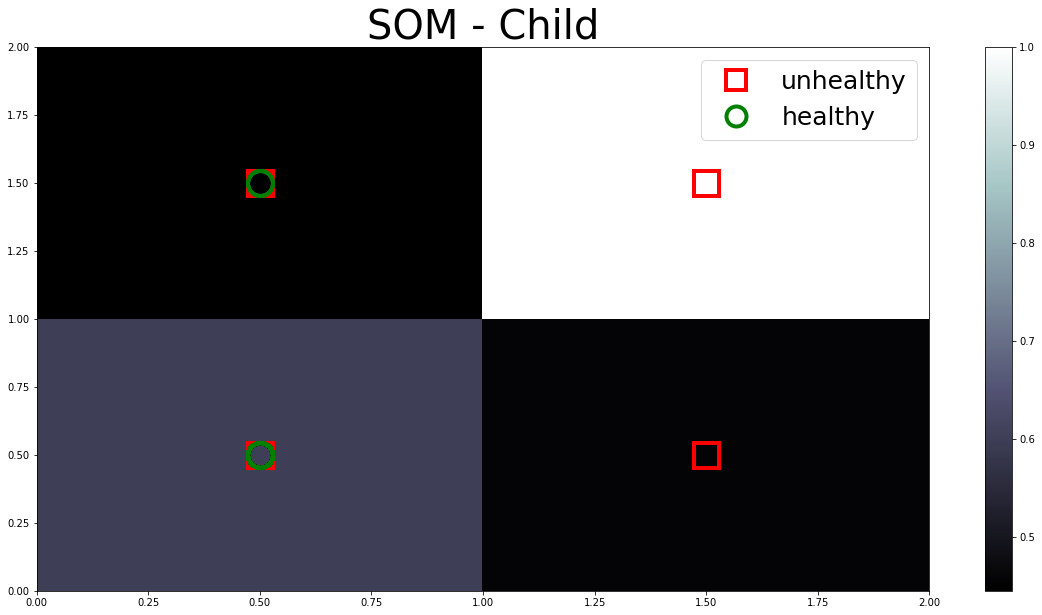

In [61]:
main_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 
                                                                                             'Age', 
                                                                                             'Health_Status', 
                                                                                             'Archaeal', 
                                                                                             'Bacteriophage', 
                                                                                             'Eukaryotic', 
                                                                                             'crassphage'], axis=1) 
main_df = main_df[['Healthy', 'Myoviridae', 'Siphoviridae', 'Podoviridae', 'Microviridae',
                     'Age_Child', 'Age_Adult', 'Age_Infant', 'Age_Elderly']] 
main_df = main_df[main_df['Age_Child'] == 1.0]
main_df = main_df.drop(['Age_Adult', 'Age_Elderly', 'Age_Infant', 'Age_Child'], axis=1)   

target = 'Healthy'
X = main_df.loc[:,main_df.columns!=target]
y = main_df.loc[:,main_df.columns==target]

oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)

virus_ml_df = pd.concat([X, y], axis=1)
X = virus_ml_df.drop(['Healthy'], axis=1).values
y = virus_ml_df['Healthy'].values 

som = MiniSom(x=2, y=2, input_len=4, sigma=1.0, learning_rate=0.1, random_seed=42)
som.random_weights_init(X)
som.train_batch(data=X, num_iteration=200)

plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar() 

markers = ['o', 's']
colors = ['green', 'red']
status = ['healthy', 'unheathy']

ls_tmp = []

for i, j in enumerate(X):          
    wn = som.winner(j)             
    plot(wn[0] + 0.5, wn[1] + 0.5, markers[int(y[i])], markeredgecolor = colors[int(y[i])], markerfacecolor = 'None', markersize=25,
                markeredgewidth = 4)
    if wn[0] == 1:
      if wn[1] == 1:
        ls_tmp.append(int(y[i]))
      
red_square = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markerfacecolor = 'None',
                          markersize=20, markeredgewidth=4, label='unhealthy')
green_circle = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markerfacecolor = 'None',
                          markersize=20, markeredgewidth=4, label='healthy')
plt.legend(handles=[red_square, green_circle], loc=1, fontsize=25)
plt.title("SOM - Child", fontsize=40)
# plt.savefig("/content/drive/MyDrive/ColabNotebooks/UMA/som_child.png", dpi=700)

print(ls_tmp.count(1)/(ls_tmp.count(0)+ls_tmp.count(1))*100)

In [62]:
mappings = som.win_map(X) 
result = mappings[(1,1)]
df_result = pd.DataFrame(result)
# df_result['Heathy'] = ls_tmp
print(df_result.shape)

columns_old = df_result.columns.tolist()

columns_main = main_df.columns.tolist()[1:]

for i in range(len(columns_old)):
  df_result = df_result.rename({columns_old[i]: columns_main[i]}, axis=1)
df_result.head()

(26, 4)


,Myoviridae,Siphoviridae,Podoviridae,Microviridae
0,0.0,102.0,0.00,0.0
1,27.5,110.0,9.16,27.5
2,0.0,135.0,0.00,539.0
3,71.3,40.7,71.30,50.9
4,0.0,236.0,36.20,90.6


In [63]:
# df = df_result[['Myoviridae', 'Siphoviridae', 'Podoviridae', 'Microviridae']]
df = df_result
df['Healthy'] = ls_tmp
df = df[df['Healthy']==1]
df

,Myoviridae,Siphoviridae,Podoviridae,Microviridae,Healthy
0,0.0,102.0,0.00,0.0,1
1,27.5,110.0,9.16,27.5,1
2,0.0,135.0,0.00,539.0,1
3,71.3,40.7,71.30,50.9,1
4,0.0,236.0,36.20,90.6,1
5,153.0,89.1,38.20,0.0,1
6,47.8,63.8,31.90,0.0,1
7,25.7,180.0,103.00,51.4,1
8,30.3,60.5,121.00,10.1,1
9,55.9,74.5,37.30,18.6,1


In [64]:
df.mean()

Myoviridae       43.965385
Siphoviridae    109.457692
Podoviridae      49.921538
Microviridae     66.534615
Healthy           1.000000
dtype: float64

In [65]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25, q75 + 1.5 * iqr)
    return boundaries

In [66]:
df_critical_values = pd.DataFrame()
for col in df.columns:
    col_outliers = calculate_outliers(df[col])
    col_max = df[col].max()
    col_stats = {'mean': df[col].mean(),
                 'q25': col_outliers[0],
                 'q75': col_outliers[1],
                 'max': col_max}
    df_critical_values[col] = pd.Series(col_stats)
df_critical_values = df_critical_values.drop(['Healthy'], axis=1).T
df_critical_values

,mean,q25,q75,max
Myoviridae,43.965385,0.0,113.5000,291.0
Siphoviridae,109.457692,65.7,212.7000,325.0
Podoviridae,49.921538,0.0,157.5625,365.0
Microviridae,66.534615,0.0,201.3750,539.0
